timestamp: 14:00:48 - 14:12:36

# Computer Vision and Convolution Neural Network with PyTorch

***
### Introduction
***
* *Computer vision can be used for various problems such as: *
  - *Binary classification*
  - *Multi class Classification*
  - *Object Detection*
  - *Segmentation*

timestamp: 14:12:38 - 14:27:48

### Computer vision Input and output shape

Image data is represented in form of :
* [batch_size,color_channel,height,wigth]
              OR

* [batch_size,height,wigth,color_channel]   

* *We generally use convulational neural network for image  processing and computer vision problems*

* *We can stack layers of CNN in any order we want or as per the problem*

timestamp: 14:27:49 - 14:37:10

### Importing PyTorch's Computer vision library **TorchVision**

### *Getting started with Computer vision with pytorch*

*Computer vision Libraries in PyTorch:*
- $1. torchvision$
- $2. torchvision.dataset$
- $3. torchvision.models$
- $4. torchvision.transforms$
- $5. torch.utils.data.Dataset$
- $5. torch.utils.data.DataLoader$



In [2]:
# getting started with Computer vision with pytorch

import torch
from torch import nn


# importing torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


#importing matplotlib
import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


timestamp: 14:37:10 - 14:51:40

### Getting a Computer vision dataset and checking input and output features


#### Getting a Dataset

We'll use FashionMNIST


In [4]:
#setting up training data
train_data=datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, #we want training data
    download=True, #do we want to download data?
    transform=torchvision.transforms.ToTensor(), # transforming the data
    target_transform=None # transforming the labels
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 169kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.79MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.5MB/s]


In [5]:
# checking parameters
len(train_data),len(test_data)

(60000, 10000)

In [6]:
#seeing the first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_name= train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
# checking image shape and image label
print(f"Image shape : {image.shape} -> [color_channel,height,width]")
print(f"Image label : {class_name[label]}")

Image shape : torch.Size([1, 28, 28]) -> [color_channel,height,width]
Image label : Ankle boot


timestamp: 14:37:10 - 15:01:33

### Visualising random samples of data



image shape : torch.Size([1, 28, 28])


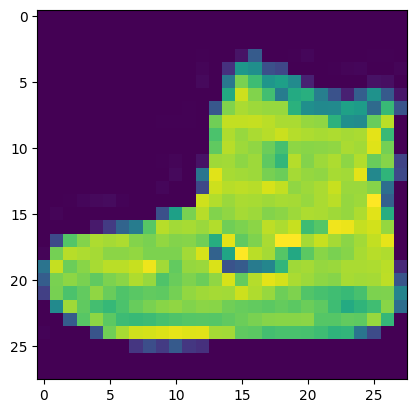

In [13]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.squeeze())

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

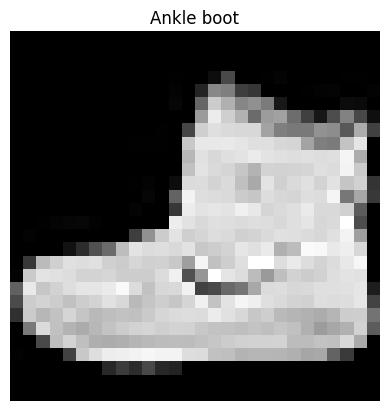

In [14]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis(False)

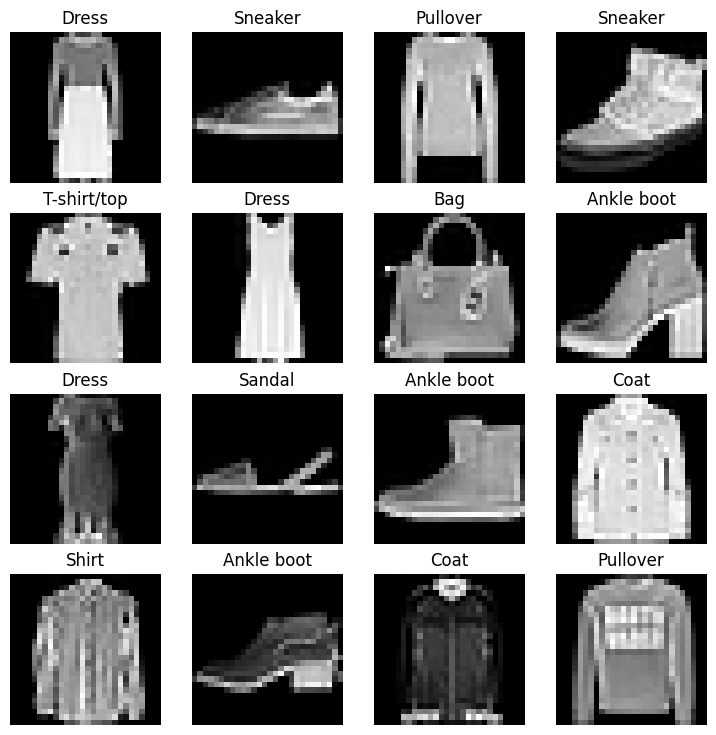

In [20]:
#ploting some more data
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1,rows*cols+1):
  random_idx= torch.randint(0,len(train_data),size=[1]).item()
  # print(random_idx)
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)